In [1]:
import pandas as pd
energy_data = pd.read_csv("energy_for_10_days.csv")
envirnoment_data = pd.read_csv("environment_for_10_days.csv")

In [2]:
display(envirnoment_data.isnull().sum().sum())
display(energy_data.isnull().sum().sum())

103370

0

In [3]:
energy_data['timestamp'] = pd.to_datetime(energy_data["timestamp"], format="%Y-%m-%d %H:%M:%S")
envirnoment_data['timestamp'] = pd.to_datetime(envirnoment_data["timestamp"], format="%Y-%m-%d %H:%M:%S")
energy_data.index = energy_data.timestamp
envirnoment_data.index = envirnoment_data.timestamp
envirnoment_data

,timestamp,sound,pressure,temp,humidity,voc,roll,pitch,yaw,Xacc,Yacc,Zacc,Xgyr,Ygyr,Zgyr,pm1.0,pm2.5,pm10,CO2
timestamp,,,,,,,,,,,,,,,,,,,
2022-11-07 00:00:00,2022-11-07 00:00:00,0.950465,1012.133533,24.767500,35.990782,29451.0,91.701984,1.329677,-60.041617,-375.0,16287.0,-474.0,2.0,3.0,-2.0,26.0,36.0,45.0,421.0
2022-11-07 00:00:01,2022-11-07 00:00:01,0.881076,1012.037290,24.777757,35.996349,29466.0,91.693083,1.319025,-60.002687,-372.0,16305.0,-469.0,3.0,5.0,0.0,26.0,36.0,45.0,421.0
2022-11-07 00:00:02,2022-11-07 00:00:02,0.863325,1012.025698,24.762371,36.002125,29467.0,91.700382,1.333419,-60.060559,-380.0,16280.0,-473.0,4.0,3.0,0.0,26.0,36.0,45.0,419.0
2022-11-07 00:00:03,2022-11-07 00:00:03,0.908509,1012.083523,24.767500,36.013384,29459.0,91.692620,1.321378,-60.022572,-371.0,16307.0,-468.0,4.0,5.0,0.0,26.0,36.0,45.0,418.0
2022-11-07 00:00:04,2022-11-07 00:00:04,0.924645,1012.091207,24.767500,36.013384,29454.0,91.696569,1.335837,-60.084356,-376.0,16282.0,-468.0,4.0,3.0,-2.0,26.0,36.0,44.0,418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 23:59:55,2022-11-18 23:59:55,1.266748,998.152750,27.367712,31.452703,29111.0,91.830421,1.404086,-60.064788,-394.0,16272.0,-510.0,0.0,3.0,-1.0,0.0,0.0,0.0,NaN
2022-11-18 23:59:56,2022-11-18 23:59:56,1.234474,998.179810,27.362583,31.458493,29102.0,91.835675,1.412571,-60.116193,-400.0,16277.0,-516.0,1.0,3.0,1.0,0.0,0.0,0.0,NaN
2022-11-18 23:59:57,2022-11-18 23:59:57,1.195746,998.199324,27.377969,31.463888,29103.0,91.845737,1.402164,-60.113403,-390.0,16281.0,-531.0,1.0,2.0,1.0,0.0,0.0,0.0,NaN


In [4]:
envirnoment_data['sound'].describe()

count    860372.000000
mean          1.104356
std           0.516331
min           0.000000
25%           0.951271
50%           1.140880
75%           1.331296
max           3.303227
Name: sound, dtype: float64

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def fill_nan_values(df):
    for i in df:
        if df[i].isnull().sum() > 0:
            df[i] = df[i].interpolate(method ='nearest', limit_direction='both')
            #df[i].fillna(method='ffill')

#fill_nan_values(energy_data)
#fill_nan_values(envirnoment_data)

In [7]:
def clip_data(df):
    for i in df:
        if i != 'timestamp':
            mean_i = df[i].mean()
            var_i = df[i].var()
            df[i] = np.clip(df[i], - mean_i - 2 * var_i, mean_i + 2 * var_i)

clip_data(envirnoment_data)
clip_data(energy_data)

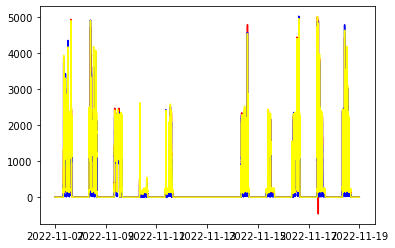

In [8]:
#Active Power Average A,B,C can combined
plt.plot(energy_data['Active Power A average [kW]'], color='red')
plt.plot(energy_data['Active Power B average [kW]'], color='blue')
plt.plot(energy_data['Active Power C average [kW]'], color='yellow')
plt.show()

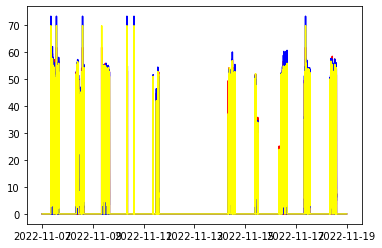

In [9]:
#TDHI A,B,C can combined
#contains high-noise in day 2
plt.plot(energy_data['THDI A average [%]'], color='red')
plt.plot(energy_data['THDI B average [%]'], color='blue')
plt.plot(energy_data['THDI C average [%]'], color='yellow')
plt.show()

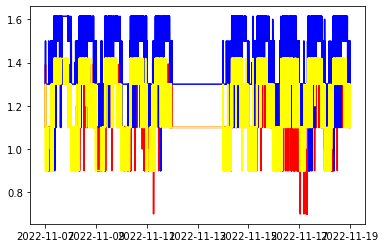

In [10]:
#TDHU A and C can be combined
#high noise between day 7 and 8
plt.plot(energy_data['THDU A average [%]'], color='red')
plt.plot(energy_data['THDU B average [%]'], color='blue')
plt.plot(energy_data['THDU C average [%]'], color='yellow')
plt.show()

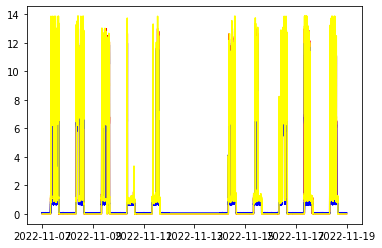

In [11]:
#Current A average A,B,C can be combined, also it's identical to Average Power Average A,B,C
plt.plot(energy_data['Current A average [A]'], color='red')
plt.plot(energy_data['Current B average [A]'], color='blue')
plt.plot(energy_data['Current C average [A]'], color='yellow')
plt.show()

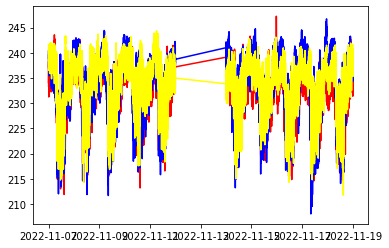

In [12]:
#can't be combined
plt.plot(energy_data['Voltage A average [V]'], color='red')
plt.plot(energy_data['Voltage B average [V]'], color='blue')
plt.plot(energy_data['Voltage C average [V]'], color='yellow')
plt.show()

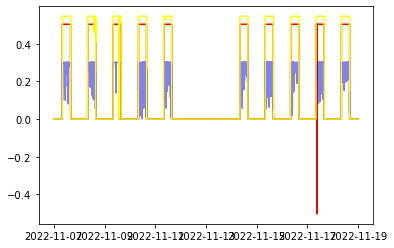

In [13]:
#Power Factor A and C can be combined
#high noise in day 9
plt.plot(energy_data['Power Factor A average'], color='red')
plt.plot(energy_data['Power Factor B average'], color='blue', alpha=0.5)
plt.plot(energy_data['Power Factor C average'], color='yellow')
plt.show()

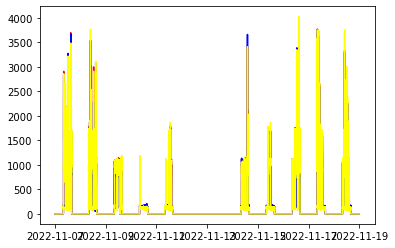

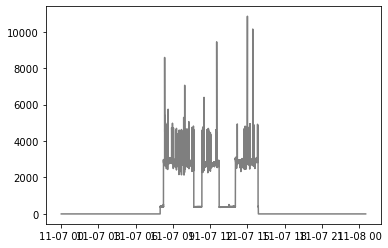

In [14]:
#Reactive Power average A,B,C can be combined
#also can be combined with Active Power average and Current Average
plt.plot(energy_data['Reactive Power A average [kVAr]'], color='red')
plt.plot(energy_data['Reactive Power B average [kVAr]'], color='blue')
plt.plot(energy_data['Reactive Power C average [kVAr]'], color='yellow')
plt.show()
plt.plot(energy_data['Reactive Power Total average [kVAr]'][0:60*60*24], color='black',alpha=0.5)
plt.show()

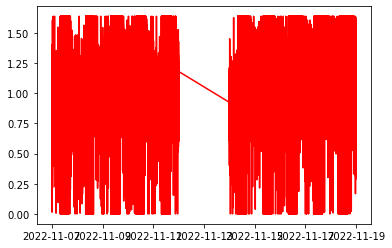

In [15]:
plt.plot(envirnoment_data['sound'], color='red')
plt.show()

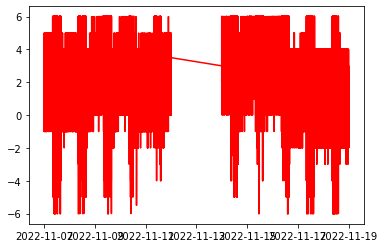

In [16]:
plt.plot(envirnoment_data['Xgyr'], color='red')
plt.show()

In [17]:
cluster_df = energy_data[['THDI A average [%]', 'THDU A average [%]', 'Reactive Power A average [kVAr]']]
temp = envirnoment_data[['temp','sound']]
cluster_df = cluster_df.merge(temp, on = 'timestamp')
cluster_df[13:16]

,THDI A average [%],THDU A average [%],Reactive Power A average [kVAr],temp,sound
timestamp,,,,,
2022-11-07 00:00:29,0.0,1.1,0.0,24.741857,0.884303
2022-11-07 00:00:30,0.0,1.1,0.0,24.739293,0.956112
2022-11-07 00:00:31,0.0,1.1,0.0,24.736728,0.893985


In [18]:
cluster_df['hour'] = cluster_df.index.hour
mask = (cluster_df['hour'] >= 8) & (cluster_df['hour'] <= 16)
cluster_df = cluster_df.loc[mask]

cluster_df['day'] = cluster_df.index.day
mask = (cluster_df['day'] >= 7) & (cluster_df['day'] < 9)
cluster_df = cluster_df.loc[mask]

#cluster_df = cluster_df.drop(columns=['hour', 'day'])
cluster_df

,THDI A average [%],THDU A average [%],Reactive Power A average [kVAr],temp,sound,hour,day
timestamp,,,,,,,
2022-11-07 08:00:16,0.0,1.1,123.643,24.434145,0.889144,8,7
2022-11-07 08:00:17,0.0,1.1,123.073,24.434145,0.995648,8,7
2022-11-07 08:00:18,0.0,1.1,125.907,24.449530,0.942396,8,7
2022-11-07 08:00:19,0.0,1.1,131.958,24.439273,0.890758,8,7
2022-11-07 08:00:20,0.0,1.1,128.152,24.431580,0.959340,8,7
...,...,...,...,...,...,...,...
2022-11-08 16:59:51,0.0,1.3,0.000,25.916302,1.397457,16,8
2022-11-08 16:59:52,0.0,1.3,0.000,25.916302,1.413594,16,8
2022-11-08 16:59:53,0.0,1.3,0.000,25.906045,1.302249,16,8


In [19]:
#cluster_df = cluster_df.resample('10s').mean()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def scale_df(df, ignored):
    desired = df.columns.difference(ignored)
    df[desired] = scaler.fit_transform(df[desired])

#scale_df(cluster_df, ['timestamp', 'hour', 'day'])

cluster_df = cluster_df.dropna()

[[8.66843931e-03 1.35723206e+00 8.86857482e+01 2.52765713e+01
  1.24008923e+00]
 [7.96041417e+00 1.36757759e+00 1.01756969e+03 2.46741591e+01
  5.18406841e-01]]
[[8.66843931e-03 1.35723206e+00 8.86857482e+01 2.52765713e+01
  1.24008923e+00]
 [8.13481187e+00 1.36893620e+00 9.46347266e+02 2.47443350e+01
  5.00438150e-01]
 [6.83959431e+00 1.35884606e+00 1.47530223e+03 2.42231524e+01
  6.33888096e-01]]
[[8.13481187e+00 1.36893620e+00 9.46347266e+02 2.47443350e+01
  5.00438150e-01]
 [2.04281037e-14 1.34206831e+00 2.95938122e-02 2.57981218e+01
  1.37051462e+00]
 [6.83959431e+00 1.35884606e+00 1.47530223e+03 2.42231524e+01
  6.33888096e-01]
 [1.26811951e-02 1.36425159e+00 1.29726065e+02 2.50351374e+01
  1.17971328e+00]]
[[6.97640826e+00 1.37695086e+00 9.03399634e+02 2.46208315e+01
  4.99668392e-01]
 [1.26811951e-02 1.36425159e+00 1.29726065e+02 2.50351374e+01
  1.17971328e+00]
 [6.78664068e+00 1.35872067e+00 1.48109169e+03 2.42159840e+01
  6.35153885e-01]
 [2.04281037e-14 1.34206831e+00 2.959

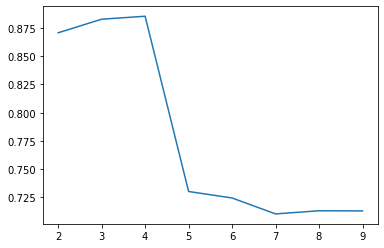

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

data_df = cluster_df[['THDI A average [%]', 'THDU A average [%]', 'Reactive Power A average [kVAr]', 'temp','sound']]
data_df = data_df.resample('10s').mean()
#scale_df(data_df, ['timestamp', 'hour', 'day'])
data_df = data_df.dropna()

sillhoute_scores = []
for n in range(2,10):
    kmeans = KMeans(n_clusters = n)
    cluster_found = kmeans.fit_predict(data_df)
    sillhoute_scores.append(silhouette_score(data_df, kmeans.labels_))
    print(kmeans.cluster_centers_)

plt.plot([x for x in range(2,10)], sillhoute_scores)

In [21]:
import pywt
tdhi_a3, cD3, cD2, cD1 = pywt.wavedec(cluster_df['THDI A average [%]'], 'db1', level=3)
tdhu_a3, cD3, cD2, cD1 = pywt.wavedec(cluster_df['THDI A average [%]'], 'db1', level=3)
power_a3, cD3, cD2, cD1 = pywt.wavedec(cluster_df['Reactive Power A average [kVAr]'], 'db1', level=3)
sound_a3, cD3, cD2, cD1 = pywt.wavedec(cluster_df['sound'], 'db1', level=3)
temp_a3, cD3, cD2, cD1 = pywt.wavedec(cluster_df['temp'], 'db1', level=3)

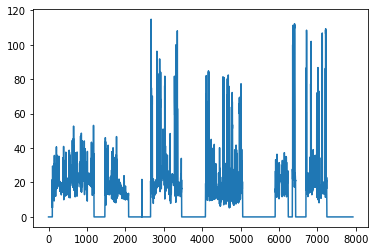

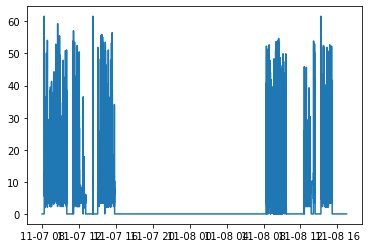

In [22]:
plt.plot(tdhi_a3)
plt.show()
plt.plot(cluster_df['THDI A average [%]'])
plt.show()

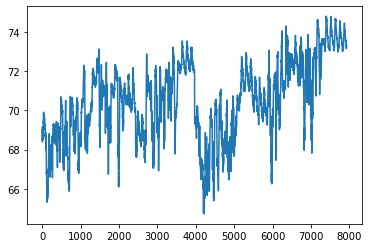

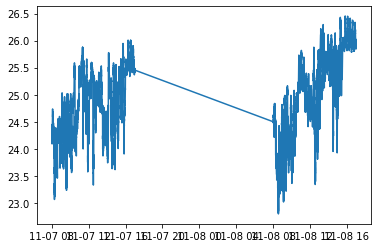

In [23]:
plt.plot(temp_a3)
plt.show()
plt.plot(cluster_df['temp'])
plt.show()

In [24]:
tdhidf = pd.DataFrame(tdhi_a3, columns = ['tdhi'])
tdhudf = pd.DataFrame(tdhu_a3, columns = ['tdhu'])
powerdf = pd.DataFrame(power_a3, columns = ['power'])
tempdf = pd.DataFrame(temp_a3, columns = ['temp'])
soundf = pd.DataFrame(sound_a3, columns = ['sound'])

In [25]:
wvt_df = pd.merge(tdhidf, tdhudf, left_index=True, right_index=True)
wvt_df = pd.merge(wvt_df, powerdf, left_index=True, right_index=True)
wvt_df = pd.merge(wvt_df, tempdf, left_index=True, right_index=True)
wvt_df = pd.merge(wvt_df, soundf, left_index=True, right_index=True)

wvt_df

,tdhi,tdhu,power,temp,sound
0,0.0,0.0,355.375605,69.127423,2.657226
1,0.0,0.0,356.014476,69.097505,2.625847
2,0.0,0.0,363.827652,69.084812,2.664358
3,0.0,0.0,369.747550,68.959701,2.725974
4,0.0,0.0,367.339852,68.593433,2.769049
...,...,...,...,...,...
7921,0.0,0.0,0.000000,73.143713,3.731242
7922,0.0,0.0,0.000000,73.194484,3.736376
7923,0.0,0.0,0.000000,73.263387,3.612572
7924,0.0,0.0,0.000000,73.315971,3.714982


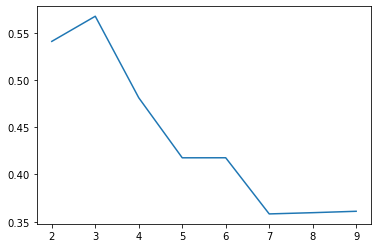

In [26]:
sillhoute_scores = []
scale_df(wvt_df, ['timestamp', 'hour', 'day'])

for n in range(2,10):
    kmeans = KMeans(n_clusters = n)
    cluster_found = kmeans.fit_predict(wvt_df)
    sillhoute_scores.append(silhouette_score(wvt_df, kmeans.labels_))

plt.plot([x for x in range(2,10)], sillhoute_scores)